In [1]:
from xgbsearch import XgbGridSearch, XgbSearchDisplay
from xgbsearch import get_titanic
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = get_titanic()

In [2]:
from xgbsearch import XgbGridSearch
from xgbsearch import get_titanic
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score

fit_params = {
    "device": "cuda",
    "objective": "binary:logistic",
    "eval_metric": ["logloss", "auc"],
}

tune_params_grid = {
    "eta": [0.01, 0.001],
    "max_depth": 5,
    "min_child_weight": 3,
}

grid_search = XgbGridSearch(tune_params_grid, fit_params)
eval_set = [(x_train, y_train, "train"), (x_test, y_test, "test")]
grid_search.fit(x_train, y_train, eval_set, 10000, 100, verbose_eval=100)

Running grid search over 2 iterations.

🟨    🏃‍♂️‍➡️ Running iteration 0.   🟨

{'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'device': 'cuda', 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc']}

[0]	TRAIN-logloss:0.65632	TRAIN-auc:0.88317	train-logloss:0.65632	train-auc:0.88317	test-logloss:0.67257	test-auc:0.88639
[100]	TRAIN-logloss:0.43236	TRAIN-auc:0.90566	train-logloss:0.43236	train-auc:0.90566	test-logloss:0.44844	test-auc:0.89256
[200]	TRAIN-logloss:0.36807	TRAIN-auc:0.91879	train-logloss:0.36807	train-auc:0.91879	test-logloss:0.39411	test-auc:0.90122
[300]	TRAIN-logloss:0.34254	TRAIN-auc:0.92414	train-logloss:0.34254	train-auc:0.92414	test-logloss:0.37939	test-auc:0.89778
[305]	TRAIN-logloss:0.34175	TRAIN-auc:0.92441	train-logloss:0.34175	train-auc:0.92441	test-logloss:0.37854	test-auc:0.89802
✅ Done!

🟨    🏃‍♂️‍➡️ Running iteration 1.   🟨

{'eta': 0.001, 'max_depth': 5, 'min_child_weight': 3, 'device': 'cuda', 'objective': 'binary:logistic', 'eval_metric

In [4]:
grid_search.results.get_models()

[XgbSearchModel(model=<xgboost.core.Booster object at 0x7fe53e92ede0>, parameters={'eta': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'device': 'cuda', 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc']}, num_boost_round=10000, early_stopping_rounds=100, model_training_results=list[OrderedDict], best_iteration=206, best_score=0.9015636720327737, best_model=<xgboost.core.Booster object at 0x7fe53e92e000>),
 XgbSearchModel(model=<xgboost.core.Booster object at 0x7fe53e92f860>, parameters={'eta': 0.001, 'max_depth': 5, 'min_child_weight': 3, 'device': 'cuda', 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc']}, num_boost_round=10000, early_stopping_rounds=100, model_training_results=list[OrderedDict], best_iteration=71, best_score=0.8926201604062085, best_model=<xgboost.core.Booster object at 0x7fe53e92f500>)]

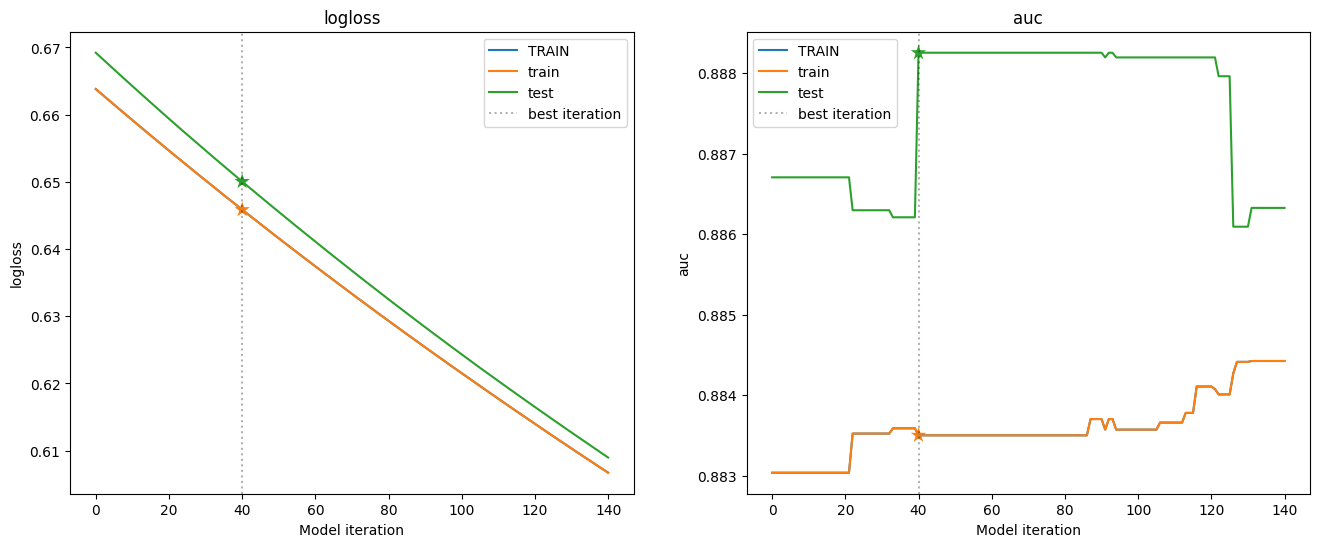

In [ ]:
grid_search.results.get_models()[1].plot_model_training()

In [4]:
df_norm = grid_search.get_best_model_results_as_df(metrics=["auc"])
df_norm

,dataset_name,metric_name,step,metric_value,is_best
0,TRAIN,auc,0,0.888237,0
1,TRAIN,auc,1,0.888369,0
2,TRAIN,auc,2,0.888369,0
3,TRAIN,auc,3,0.888369,0
4,TRAIN,auc,4,0.888369,0
...,...,...,...,...,...
437,test,auc,437,0.887084,0
438,test,auc,438,0.887084,0
439,test,auc,439,0.887142,0
440,test,auc,440,0.886909,0


<Axes: xlabel='step', ylabel='metric_value'>

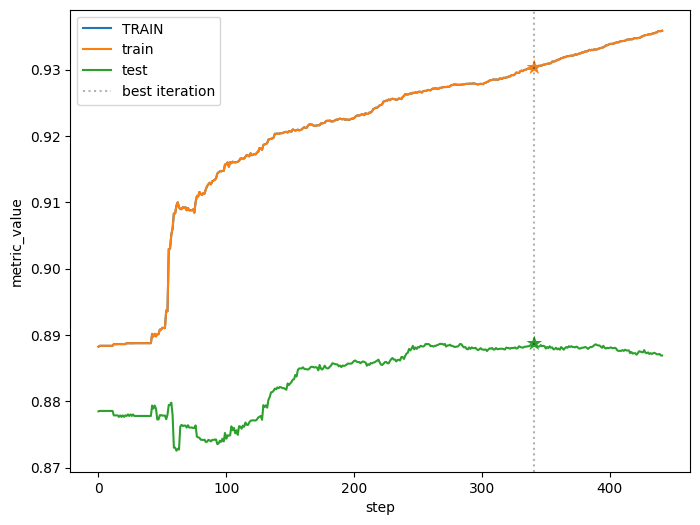

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(data=df_norm, x="step", y="metric_value", hue="dataset_name", ax=ax)
plt.axvline(
    x=df_norm.query("is_best == 1").step.min(),
    color="black",
    linestyle=":",
    label="best iteration",
    alpha=0.3,
)
plt.legend()

sns.scatterplot(
    data=df_norm.query("is_best == 1"),
    x="step",
    y="metric_value",
    hue="dataset_name",
    ax=ax,
    s=250,
    marker="*",
    legend=False,
)

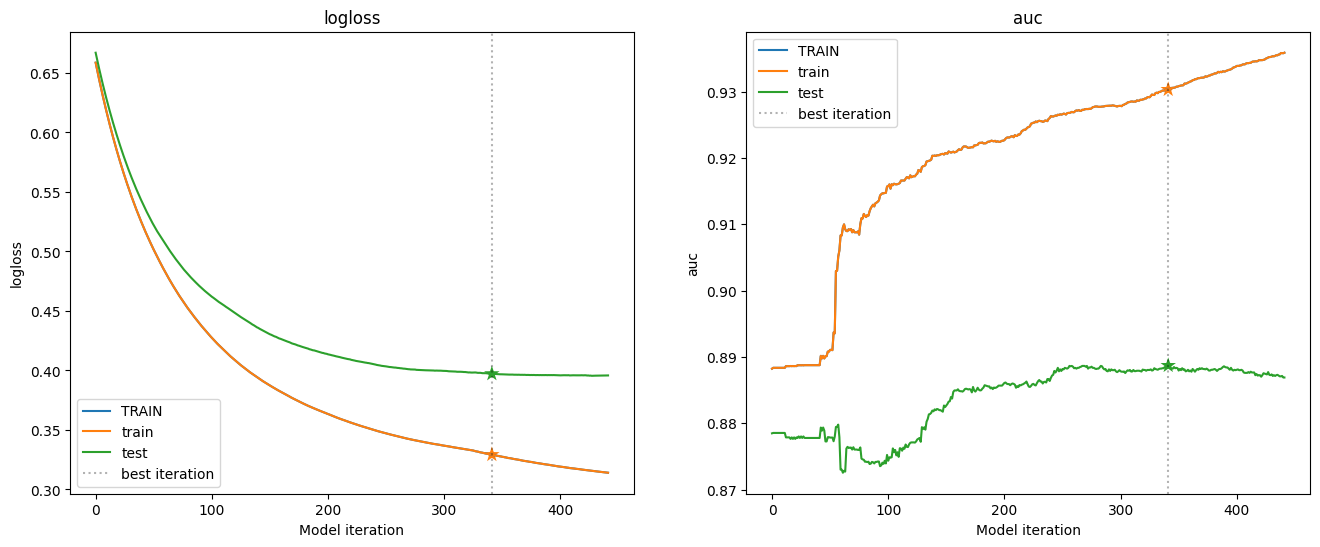

In [6]:
grid_search.plot_best_model_training_performance()

In [30]:
a = [1, 2]
b = [3, 4]
# a.append(b)
a = a + b
a

[1, 2, 3, 4]